In [1]:
#@author-Tejasvi Sharma
#To gain insights from H1-B petition data set from kaggle.com
#Objectives- 1)To find percent of H1B petitions approved every year.
#2)To find companies who filed most of the H1B petitions.
#3)Top 5 jobs for which most h1b petitions are filed.
#4)How H1b Salaries vary from state to state.
#5)Top 10 states from which highest number of application are filed.
#6)Heap Map using lat and long
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
#loading data into a dataframe
df=pd.read_csv("h1b_kaggle.csv")

In [3]:
#basics about the data set
print(df.info())
#head of data
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            int64
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB
None


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
#checking whether first column is unique or not,if True it means it is unique, remaning it to Unique_Id.
print(df['Unnamed: 0'].nunique()==df.shape[0])
df.rename(columns={'Unnamed: 0':"Unique_Id"},inplace=True)

True


In [5]:
#removing null values, not many values are removed from the data set
df=df.dropna()
df["YEAR"]=df["YEAR"].astype(int)
print(df.shape)

(2877765, 11)


In [6]:
# checking unique values in column CASE_STATUS
print(df['CASE_STATUS'].unique())
#According to the data description, there were only 4 values, “Certified,” “Certified-Withdrawn,” Denied,” and “Withdrawn”.
#So only focusing on rows with these values

['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']


In [7]:
#split Worksite to get State from worksite
df['State']=df['WORKSITE'].str.split(",").str[1]

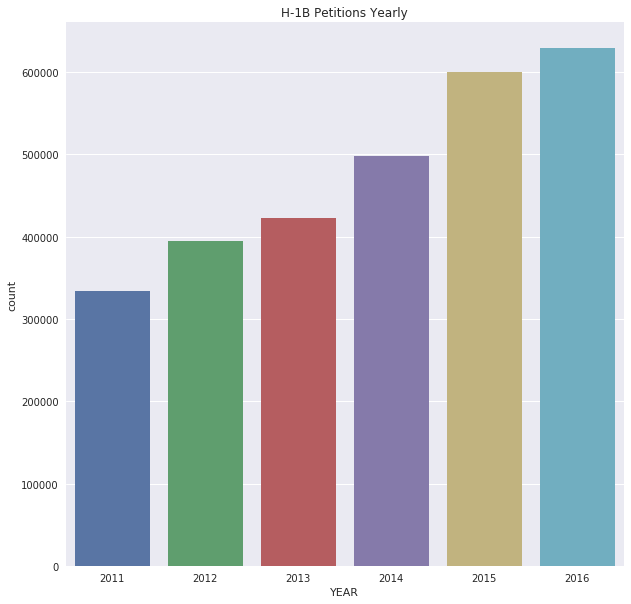

In [8]:
#H-1B has been increasing year by year and have almost doubled from 2011 to 2016
plt.figure(figsize=(10,10))
sns.countplot(df["YEAR"])
plt.title("H-1B Petitions Yearly")
plt.show()

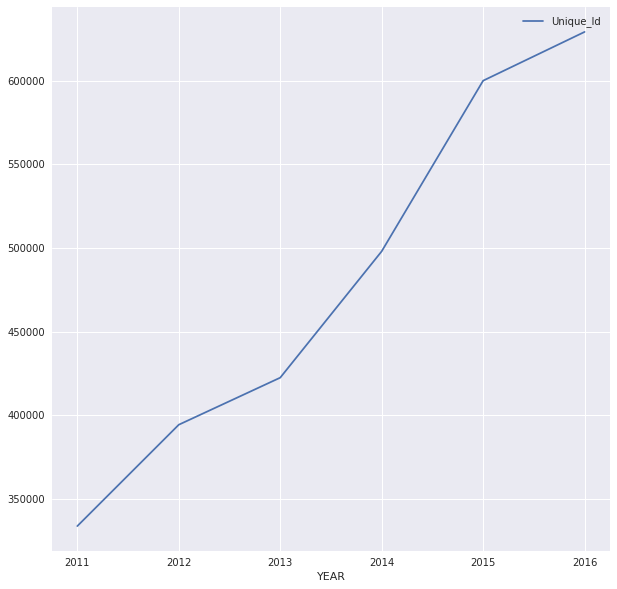

In [9]:
#line chart for thr H1-B application
df[["YEAR","Unique_Id"]].groupby("YEAR").count().plot(figsize=(10,10))
plt.show()

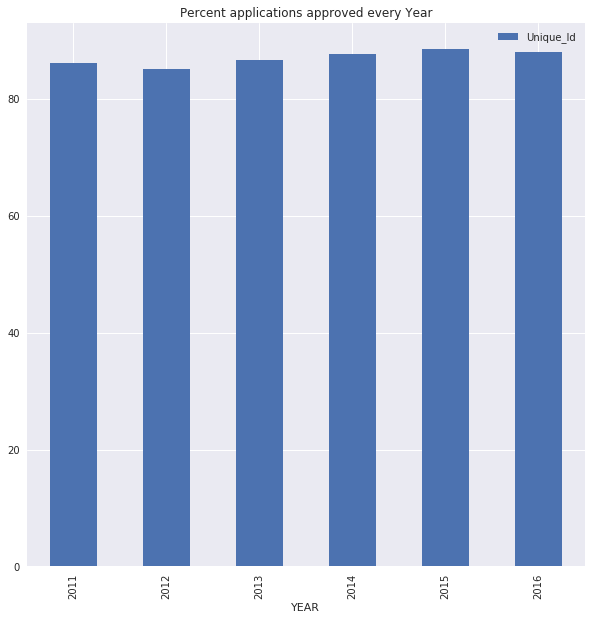

In [10]:
#checking for percent of applications approved by the USCIS every year.
#so every year almost same percent of applications were certified by DOL
percent_approved=pd.DataFrame(df[df['CASE_STATUS']=='CERTIFIED'].groupby("YEAR").agg('count')["Unique_Id"]/df.groupby("YEAR").agg('count')["Unique_Id"]*100)
percent_approved.plot.bar(figsize=(10,10),title="Percent applications approved every Year")
plt.show()

In [11]:
#trying to find out companies who fill h1b petitions the most
#infosys has filed for most of the h1b petitions from 2011 to 2016
df1=df[["EMPLOYER_NAME","Unique_Id"]].groupby("EMPLOYER_NAME").agg("count").sort_values(by="Unique_Id",ascending=False)
df1["percent"]=df1["Unique_Id"]*100/df.shape[0]
df1

,Unique_Id,percent
EMPLOYER_NAME,,
INFOSYS LIMITED,130257,4.526325
TATA CONSULTANCY SERVICES LIMITED,64273,2.233435
WIPRO LIMITED,45673,1.587100
DELOITTE CONSULTING LLP,35999,1.250936
IBM INDIA PRIVATE LIMITED,33585,1.167052
ACCENTURE LLP,33226,1.154577
MICROSOFT CORPORATION,25551,0.887877
"HCL AMERICA, INC.",22488,0.781440
ERNST & YOUNG U.S. LLP,18094,0.628752


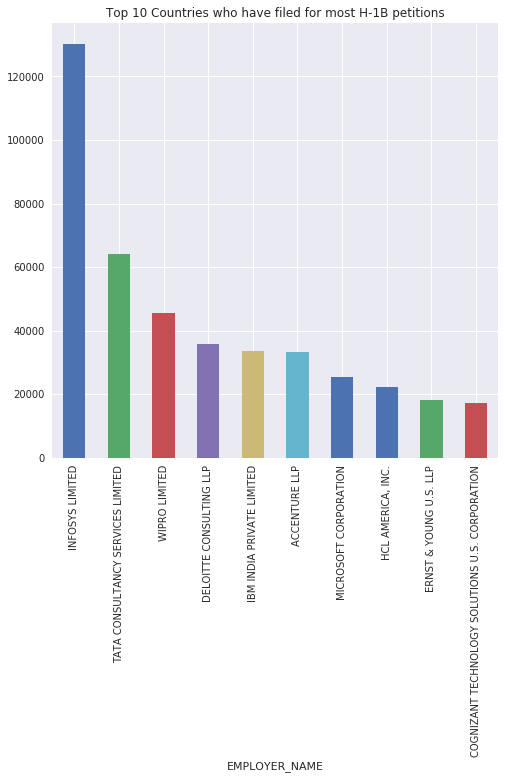

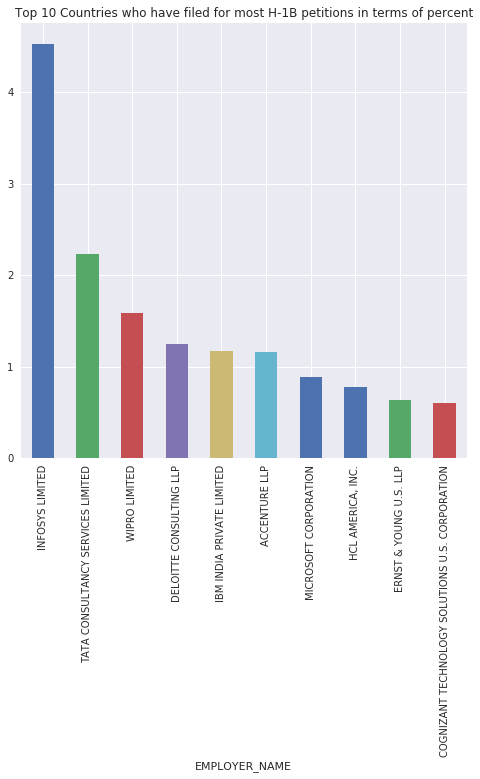

In [12]:
#ploting graph for displaying the top 10 companies for h1b petitions
df1.iloc[0:10,0].plot.bar(figsize=(8,8),title="Top 10 Countries who have filed for most H-1B petitions")
plt.show()
#ploting graph for displaying the top 10 companies for h1b petition in percent of applications with respect to total applications
df1.iloc[0:10,1].plot.bar(figsize=(8,8),title="Top 10 Countries who have filed for most H-1B petitions in terms of percent")
plt.show()

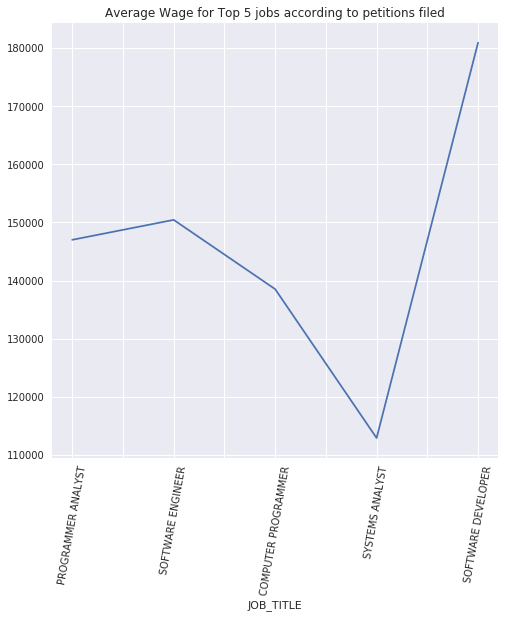

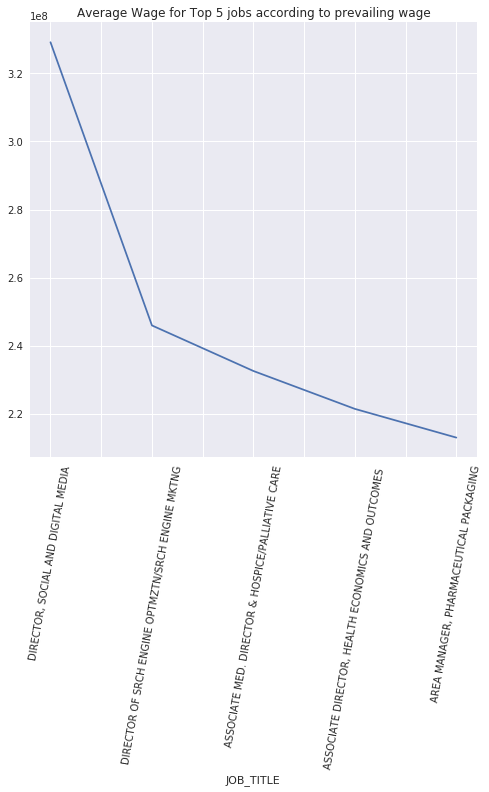

In [42]:
#top 5 jobs with highest h1b petitions and average salaries
job_wage=df[['JOB_TITLE','PREVAILING_WAGE']].groupby("JOB_TITLE").agg("mean")
job_count=df[['Unique_Id','JOB_TITLE']].groupby("JOB_TITLE").agg("count")
df2=job_wage.join(job_count).sort_values(ascending=False,by="Unique_Id").iloc[0:5,:]
df3=job_wage.join(job_count).sort_values(ascending=False,by="PREVAILING_WAGE").iloc[0:5,:]

df2["PREVAILING_WAGE"].plot.line(figsize=(8,8),title="Average Wage for Top 5 jobs according to petitions filed")
plt.xticks(rotation=80)
plt.show()

df3["PREVAILING_WAGE"].plot.line(figsize=(8,8),title="Average Wage for Top 5 jobs according to prevailing wage")
plt.xticks(rotation=80)
plt.show()